In [42]:
import numpy as np
import matplotlib.pyplot as plt

data_sizes = list([int(item) for item in 10**np.linspace(1,4,num=22)]) + list([int(item) for item in list(10**np.linspace(4,5,num=8)[1:6])+[60000]])
#alphas = 10**np.linspace(-1,2,num=31)
alphas = 10**np.linspace(-1,1,num=21)

train_accss = []
test_accss = []
train_lossss = []
test_lossss = []

for data_size in data_sizes:
    train_accs = []
    test_accs = []
    train_losss = []
    test_losss = []
    for alpha in alphas:
        train_acc = np.loadtxt("./mnist_landscape/trainacc_%d_%.2f.txt"%(data_size, alpha))
        test_acc = np.loadtxt("./mnist_landscape/testacc_%d_%.2f.txt"%(data_size, alpha))
        train_loss = np.loadtxt("./mnist_landscape/trainloss_%d_%.2f.txt"%(data_size, alpha))
        test_loss = np.loadtxt("./mnist_landscape/testloss_%d_%.2f.txt"%(data_size, alpha))
        train_accs.append(train_acc)
        test_accs.append(test_acc)
        train_losss.append(train_loss)
        test_losss.append(test_loss)
    train_accss.append(train_accs)
    test_accss.append(test_accs)
    train_lossss.append(train_losss)
    test_lossss.append(test_losss)
    
train_accss = np.array(train_accss)
test_accss = np.array(test_accss)
train_lossss = np.array(train_lossss)
test_lossss = np.array(test_lossss)



/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


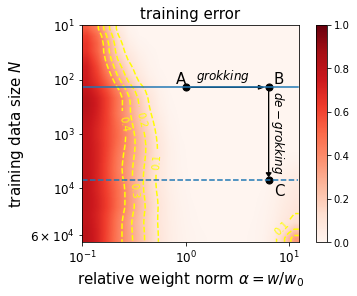

In [43]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors
import torch

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0, vmax=1.0)

plot_scale = ps = 10

blur = gaussian_filter(1-np.array(train_accss)[:,:], sigma=1)
train_large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
plt.imshow(train_large, cmap='Reds', norm=norm, aspect=0.75)
plt.colorbar()

x = np.arange(21*plot_scale)
y = np.arange(28*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, train_large, [0.1,0.2,0.3,0.4], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)

plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,4))

plt.xticks([0,10*plot_scale,20*plot_scale],[r"$10^{-1}$", r"$10^0$", r"$10^1$"], fontsize=12)
plt.yticks([0,7*plot_scale,14*plot_scale,21*plot_scale,27*plot_scale],[r"$10^1$", r"$10^2$", r"$10^3$", r"$10^4$", r"$6\times 10^4$"], fontsize=12)
plt.xlabel("relative weight norm "+r"$\alpha=w/w_0$", fontsize=15)
plt.ylabel("training data size "+r"$N$", fontsize=15)
plt.title("training error", fontsize=15)


plt.scatter(10*ps,8*ps, s=50, color="black")
plt.scatter(18*ps,8*ps, s=50, color="black")
plt.scatter(18*ps,20*ps, s=50, color="black")

plt.text(9.*ps,7.5*ps, "A", fontsize=15, color="black")
plt.text(18.5*ps,7.5*ps, "B", fontsize=15,color="black")
plt.text(18.5*ps,22*ps, "C", fontsize=15,color="black")

plt.text(11*ps, 7*ps, r"$grokking$", fontsize=12)
plt.text(18*ps, 18.5*ps, r"$de-grokking$", fontsize=12, rotation=-90)

plt.arrow(10.5*ps,8*ps,6.5*ps,0*ps, head_width=5, head_length=5, color="black")
plt.arrow(18*ps,8*ps,0*ps,11*ps, head_width=5, head_length=5, color="black")

plt.plot([0*ps,20.8*ps],[8*ps,8*ps], color='#1f77b4')
plt.plot([0*ps,20.8*ps],[20*ps,20*ps], color='#1f77b4',ls="--")

plt.savefig('./mnist_train_error.pdf', bbox_inches="tight")

/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:3631: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


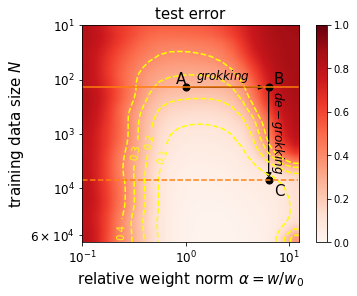

In [44]:
from scipy.ndimage.filters import gaussian_filter
import matplotlib.colors as mcolors
import torch

class MyNormalize(mcolors.Normalize):
    def __call__(self, value, clip=None):
        # function to normalize any input between vmin and vmax linearly to [0,1]
        n = lambda x: (x-self.vmin)/(self.vmax-self.vmin)
        # nonlinear function between [0,1] and [0,1]
        f = lambda x: x
        return np.ma.masked_array(f(n(value)))
    
norm=  MyNormalize(vmin=0, vmax=1.0)

plot_scale = ps = 10

blur = gaussian_filter(1-np.array(test_accss)[:,:], sigma=1)
test_large = torch.nn.functional.interpolate(torch.tensor(blur).unsqueeze(dim=0).unsqueeze(dim=0), scale_factor=(plot_scale,plot_scale), mode='bilinear')[0,0].detach().numpy()
plt.imshow(test_large, cmap='Reds', norm=norm, aspect=0.75)
plt.colorbar()

x = np.arange(21*plot_scale)
y = np.arange(28*plot_scale)
X, Y = np.meshgrid(x, y)
#fig, ax = plt.subplots()
CS = plt.gca().contour(X, Y, test_large, [0.1,0.2,0.3,0.4], colors=["yellow","yellow"], linestyles=["dashed", "dashed"])
plt.gca().clabel(CS, inline=True, fontsize=10)

plt.ticklabel_format(style='sci', axis='y', scilimits=(-4,4))

plt.xticks([0,10*plot_scale,20*plot_scale],[r"$10^{-1}$", r"$10^0$", r"$10^1$"], fontsize=12)
plt.yticks([0,7*plot_scale,14*plot_scale,21*plot_scale,27*plot_scale],[r"$10^1$", r"$10^2$", r"$10^3$", r"$10^4$", r"$6\times 10^4$"], fontsize=12)
plt.xlabel("relative weight norm "+r"$\alpha=w/w_0$", fontsize=15)
plt.ylabel("training data size "+r"$N$", fontsize=15)
plt.title("test error", fontsize=15)

#plt.plot([0,30.8*ps],[3.4*ps,3.4*ps], ls="--", color="black")

#plt.arrow(2*ps,2*ps,-1.5*ps,1*ps, head_width=5, head_length=5, color="black")
#plt.text(2.2*ps,2*ps,"critical size to reach val acc > 0.6", fontsize=10)

plt.scatter(10*ps,8*ps, s=50, color="black")
plt.scatter(18*ps,8*ps, s=50, color="black")
plt.scatter(18*ps,20*ps, s=50, color="black")

plt.text(9.*ps,7.5*ps, "A", fontsize=15, color="black")
plt.text(18.5*ps,7.5*ps, "B", fontsize=15,color="black")
plt.text(18.5*ps,22*ps, "C", fontsize=15,color="black")

plt.text(11*ps, 7*ps, r"$grokking$", fontsize=12)
plt.text(18*ps, 18.5*ps, r"$de-grokking$", fontsize=12, rotation=-90)

plt.arrow(10.5*ps,8*ps,6.5*ps,0*ps, head_width=5, head_length=5, color="black")
plt.arrow(18*ps,8*ps,0*ps,11*ps, head_width=5, head_length=5, color="black")

plt.plot([0*ps,20.8*ps],[8*ps,8*ps], color='#ff7f0e')
plt.plot([0*ps,20.8*ps],[20*ps,20*ps], color='#ff7f0e', ls="--")


plt.savefig('./mnist_val_error.pdf', bbox_inches="tight")

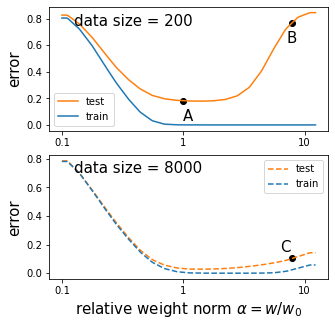

In [48]:
plt.figure(figsize=(5,5))

plt.subplot(2,1,1)

plt.plot(test_large[10*ps], color='#ff7f0e')
plt.plot(train_large[10*ps], color='#1f77b4')
plt.xticks(np.arange(0,40,10)*ps, [0.1,1,10,100])
plt.ylabel("error", fontsize=15)
plt.legend(["test", "train"])
plt.text(1*ps, 0.75, "data size = 200", fontsize=15)

plt.scatter(10*ps,test_large[10*ps,10*ps],color="black")
plt.scatter(19*ps,test_large[10*ps,19*ps],color="black")
plt.text(10*ps,test_large[10*ps,10*ps]-0.15,"A",fontsize=15)
plt.text(18.5*ps,test_large[10*ps,19*ps]-0.15,"B",fontsize=15)
#plt.title("LU: data size = 300", fontsize=15)

plt.subplot(2,1,2)

plt.plot(test_large[20*ps], color='#ff7f0e', ls="--")
plt.plot(train_large[20*ps], color='#1f77b4',ls="--")
plt.xticks(np.arange(0,40,10)*ps, [0.1,1,10,100])
plt.ylabel("error", fontsize=15)
plt.legend(["test", "train"])
plt.text(1*ps, 0.7, "data size = 8000", fontsize=15)

plt.scatter(19*ps,test_large[20*ps,19*ps],color="black")
plt.text(18*ps,test_large[19*ps,19*ps]+0.0,"C",fontsize=15)
#plt.title("UU: data size = 7000", fontsize=15)


plt.xlabel("relative weight norm "+r"$\alpha=w/w_0$", fontsize=15)

plt.savefig('./mnist_LU_UU.pdf', bbox_inches="tight")